# Map projections

**Coordinate reference systems (CRS)** are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates are related to places on the Earth. **A map projection** (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees). This transformation is used to **represent the three dimensional earth on a flat, two dimensional map**.

As the CRS in different spatial datasets differ fairly often (i.e. one might have coordinates defined in decimal degrees while the other one has them in meters), it is a common procedure to **reproject** (or redefine) different layers into a common CRS. It is important that the layers are in the same coordinate reference system when analyzing the spatial relationships between the layers, for example, when making a Point in Polygon -query, or other type of overlay analysis.

Choosing an appropriate projection for your map is not always straightforward because it depends on what you actually want to represent with your map, and what is the spatial scale of your data. In fact, there does not exist a "perfect projection" since each one of them has some strengths and weaknesses, and you should choose such projection that fits best for your needs. In fact, the projection you choose might even tell something about you 😉:
    
![](img/Map-projections.png)
*Source: XKCD, See a full comic about ["What your favorite map projection tells about you"](https://xkcd.com/977/)*.

For those of you who want a bit more analytical approach for choosing the projection, you can get a good overview from [georeference.org](http://www.georeference.org/doc/guide_to_selecting_map_projections.htm), or from this blog post introducing [the strengths and weaknesses of a few commonly used projections](http://usersguidetotheuniverse.com/index.php/2011/03/03/whats-the-best-map-projection/).

## Coordinate reference system (CRS) in Geopandas

Luckily, defining and changing projections is easy in Geopandas. In this tutorial we will see **how to retrieve the
coordinate reference system information from the data, and how to change the crs**. We will re-project a data file from
WGS84 (lat, lon coordinates) into a Lambert Azimuthal Equal Area projection which is the [recommended projection for
Europe](http://mapref.org/LinkedDocuments/MapProjectionsForEurope-EUR-20120.pdf) by European Commission.

For this tutorial we will be using a Shapefile called `Europe_borders.shp` representing the country borders in Europe, that you already should have [downloaded during the previous tutorial](geopandas-basics.ipynb) into `L2_data` folder. 

In Shapefiles, information about the coordinate reference system i stored in the `.prj` -file (if this file is missing, you might be in trouble!). When reading the data into `GeoDataFrame` with Geopandas crs information is automatically stored into the `.crs` attribute of the GeoDataFrame.

- Let's start by reading the data from the `Europe_borders.shp` file and checking the `crs`:

In [5]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 3803-A821

 Directory of C:\Workspace\Gits\TEACHING\PythonGIS\L2

01/29/2020  02:57 PM    <DIR>          .
01/29/2020  02:57 PM    <DIR>          ..
01/29/2020  02:55 PM    <DIR>          .ipynb_checkpoints
01/24/2020  11:39 AM            11,311 0_data_io.ipynb
01/24/2020  11:39 AM            29,485 1_geopandas-basics.ipynb
01/29/2020  02:57 PM            27,344 2_projections.ipynb
01/24/2020  11:39 AM            14,410 calculating-distances.ipynb
01/24/2020  11:39 AM             7,828 geopandas-geometries.ipynb
01/24/2020  11:39 AM    <DIR>          img
               5 File(s)         90,378 bytes
               4 Dir(s)  257,668,616,192 bytes free


In [6]:
# Import necessary packages
import geopandas as gpd

# Read the file
fp = "../L2_data/Europe_borders.shp"
data = gpd.read_file(fp)

In [7]:
# Check the coordinate reference system
data.crs

{'init': 'epsg:4326'}

As we can see, here, the `crs` is a Python dictionary with a key `init` that has a value `epsg:4326`. This is a very typical way how CRS is stored in GeoDataFrames. There are, however, other more informative formats for representing the coordinate reference system, which we will learn in a bit. 

The EPSG number (named after the *European Petroleum Survey Group*) is a code that tells about the coordinate system of the dataset. "[EPSG Geodetic Parameter Dataset](http://www.epsg.org/) is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local in application".

The EPSG code of our geodataframe is`4326`, which refers to the WGS84 coordinate system (we can also figure this out by looking at the coordinates values which are longitude and latitudes decimal degrees).

You can find a lot of information and lists of available coordinate reference systems from:

  - [www.spatialreference.org](http://spatialreference.org/)
  - [www.proj4.org](https://proj4.org/operations/projections/)
  - [www.mapref.org](http://mapref.org/CollectionofCRSinEurope.html)

- Let's continue by checking the values in our `geometry` -column to verify that the CRS of our GeoDataFrame seems correct:

As we can see, the coordinate values of the Polygons indeed look like latitude and longitude values, so everything seems to be in order.

WGS84 projection is not really a good one for representing European borders (areas get distorted), so let's convert those geometries into Lambert Azimuthal Equal Area projection ([EPSG: 3035](http://spatialreference.org/ref/epsg/etrs89-etrs-laea/)) which is the recommended projection by European Comission.

Changing the projection is simple to [do in Geopandas](http://geopandas.org/projections.html#re-projecting) with `.to_crs()` -function which is a built-in function of the GeoDataFrame. The function has two alternative parameters 1) `crs` and 2) `epgs` that can be used to make the coordinate transformation and re-project the data into the CRS that you want to use. 

- Let's re-project our data into `EPSG 3035` using `epsg` -parameter:

In [ ]:
# Let's make a backup copy of our data

# Reproject the data


In [10]:
# Let's make a backup copy of our data
data_wgs84 = data.copy()

# Reproject the data
data = data.to_crs(epsg=3505)

And here we go, the coordinate values in the geometries have changed! Now we have successfully changed the projection of our layer into a new one, i.e. to `ETRS-LAEA` projection. 

To really understand what is going on, it is good to explore our data visually. Hence, let's compare the datasets by making
maps out of them.


ImportError: The descartes package is required for plotting polygons in geopandas.

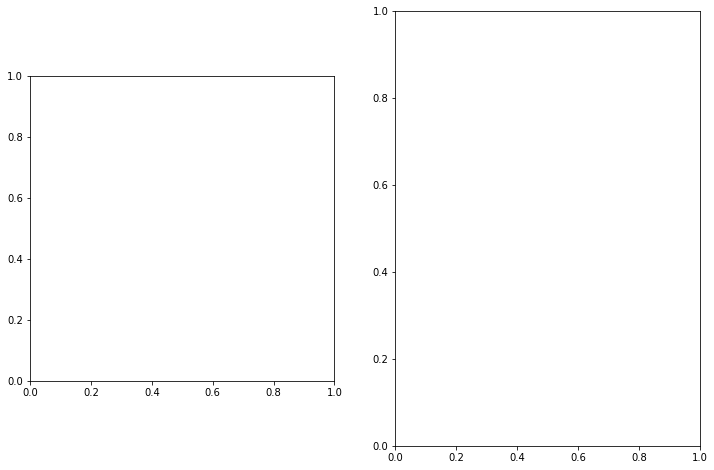

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
data_wgs84.plot(ax=ax1)

# Add title for ax 1

# Plot the one with ETRS-LAEA projection

# Add title for ax 2

# Remove empty white space around the plot
plt.tight_layout()

Indeed, the maps look quite different, and the re-projected one looks much better in Europe as the areas especially in the north are more realistic and not so stretched as in WGS84.

- Finally, let's save our projected layer into a Shapefile so that we can use it later.

In [ ]:
# Ouput filepath
outfp = "L2_data/Europe_borders_epsg3035.shp"
    
# Save to disk
#data.to_file(outfp)

## Dealing with different CRS formats

There are various ways to present Coordinate Reference System information, such as [PROJ strings](https://proj.org/usage/quickstart.html), `EPSG codes`, `Well-Known-Text (WKT)`, `JSON`. It is likely that you will encounter some of these when working with spatial data obtained from different sources. Being able to convert the CRS information from one format to another is needed every now and then, hence, it is useful to know a few tricks how to do this.

Luckily, dealing with CRS information is easy in Python using a library called [pyproj](https://pyproj4.github.io/pyproj/stable/). In fact, `pyproj` is a Python wrapper around a software called [PROJ](https://proj.org/) (maintained by [OSGeo](https://www.osgeo.org/) community), which is widely used tool for conducting coordinate transformations in various GIS softwares. `Pyproj` is also used under the hood in Geopandas, and it handles all the CRS definitions and coordinate transformations (reprojecting from CRS to another as we did earlier).

Next, let's see how it is possible to easily extract useful information from CRS, and transform CRS information from format to another. `pyproj` -library has a [class](https://docs.python.org/3/tutorial/classes.html) called [CRS](https://pyproj4.github.io/pyproj/dev/api/crs.html) that provides many useful functionalities for dealing with CRS information.

In [ ]:
# Let's see the current CRS of our data


The `data.crs` returns the coordinate reference system as a dictionary of PROJ parameters. From here we can easily see that the EPSG code of the data is `3035`. 

However, let's see how the same information looks like in other formats such as `WKT` or `Proj4` text. For this we need to use the `CRS` class.  

<div class="alert alert-info">

**Updating pyproj**
    
If you are using your own computer and are having trouble importing the CRS class from the pyproj module, try updating pyproj:
```
conda update pyproj -c conda-forge
```
The following examples have been tested to work with `pyproj` version `2.4.0` and `geopandas` version `0.6.1`. You can check package versions by running the `conda list` -command.
   
</div>

As we can see, the `CRS` object contains a lot more information than the original crs dictionary. The data contains some useful information such as the `Name` of the CRS (ETRS89/LAEA Europe), the `area` where the CRS is in use (*Europe* with bounds *(-16.1, 32.88, 40.18, 84.17)*), and the `Datum` (European Terrestrial Reference System 1989). 

We can also easily parse this information individually as follows: 

In [ ]:
# Name


# Coordinate system


# Bounds of the area where CRS is used


You can easily explore all the possible information that can be extracted from the CRS by typing `crs_info.` and pressing Tabulator. 

Let's see how we can convert the crs information from one format to another. Quite often it is useful to know the EPSG code of the CRS. Next, we will conduct a few transformations to demonstrate the capabilities of the `CRS` class.

In [ ]:
# Retrive CRS information in WKT format


As we can see, the `WKT` format contains a *lot* of information. Typically, e.g. the `.prj` file of a Shapefile contains the information in this format. Let's see how it is possible to extract `EPSG` code from this. For doing it, we need to re-initialize the CRS object, this time from the `WKT` text presentation.   

In [ ]:
# Retrieve EPSG code from WKT text


<div class="alert alert-info">

**Not able to recognize epsg?**
    
Sometimes `to_epsg()` isn't able to recognize the EPSG code from the WKT representation. This can happen if the WKT information is missing some details. Luckily, we can easily adjust the minimum level of confidence for matching the CRS info and the EPSG code. We can do this by adjusting a parameter `min_confidence` when calling the function. By default, the confidence level is 70 %, but it is also possible to set a lower confidence threshold. 
    
The coordinate information of our input shapefile is incomplete, and does not yield an epsg value with default setting: However, CRS is able to determine the EPSG value with a lower confidence treshold: 
    
```
# Let's try to extract the EPSG code from the crs of our original data:
CRS(data.crs).to_epsg()
>>> None
    
# Let's try it again with a lower confidence requirement (25 %)
CRS(data.crs).to_epsg(min_confidence=25)
>>> 3035
```
However, be cautious when using this, as guessing the EPSG from "exotic" coordinate reference systems might also provide false results. 
</div>

Let's now save our data to disk using the `WKT` format as the crs of our GeoDataFrame. WKT is a [preferred output format](https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems) for crs information:

In [ ]:
# Re-define the CRS of the input GeoDataFrame 


In [ ]:
# Ouput filepath
outfp = "L2_data/Europe_borders_epsg3035.shp"
    
# Save to disk
#data.to_file(outfp)

That's it. 


**HINT**: A module called [PyCRS](https://github.com/karimbahgat/PyCRS) can also be useful library as it contains information and supports many different coordinate reference definitions, such as OGC WKT (v1), ESRI WKT, Proj4, and any EPSG, ESRI, or SR-ORG code available from spatialreference.org.

### Overview of different crs formats

Summary of different ways of representing crs information using pyproj CRS. Here, we use the crs of the original European borders layer as a starting point:

In [ ]:
# PROJ dictionary:
crs_dict = data_wgs84.crs

# pyproj CRS object:
crs_object = CRS(data_wgs84.crs)

# EPSG code (here, the input crs information is a bit vague so we need to lower the confidence threshold)
crs_epsg = CRS(data_wgs84.crs).to_epsg(min_confidence=25)

# PROJ string
crs_proj4 = CRS(data_wgs84.crs).to_proj4()

# Well-Known Text (WKT)
crs_wkt = CRS(data_wgs84.crs).to_wkt()

In [ ]:
print("PROJ dictionary:\n", crs_dict)
print("\nCRS object:\n", crs_object)
print("\nEPSG code: \n", crs_epsg)
print("\nPROJ string: \n", crs_proj4)
print("\nWell-Known Text (WKT):\n",crs_wkt) 

## Global map projections

Finally, let's play around with global map projections :) `L2_data` folder conaints a layer `ne_110m_admin_0_countries.shp` that represents the country borders of the world. The data was fownloaded from https://www.naturalearthdata.com/. 

<div class="alert alert-info">

**TASK**
    
Read in a global dataset and plot three maps with a different projections! See hints and projection definitions from:
    
- http://geopandas.org/projections.html
- https://pyproj4.github.io/pyproj/dev/api/crs.html
- https://spatialreference.org/
   
</div>


## Summary
That's it! In this section we learned how to:

1. reproject (transform) the geometries from crs to another using the `to_crs()` -function in GeoPandas
2. Define the coordinate reference system in different formats using `pyproj` `CRS`